In [340]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install mysql-connector-python


In [341]:
#Connecting SQL

import mysql.connector
con = mysql.connector.connect(user = 'hbs-student', password = 'super-secure-password?', host = 'hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com', database = 'movies')
cur = con.cursor()

In [163]:
#Importing SQL data (IMDB Ratings)

cur.execute("""SELECT *
                FROM movies.imdb_title_ratings
                JOIN movies.imdb_title_basics USING (tconst)
                JOIN movies.imdb_title_crew USING (tconst)
                LEFT JOIN movies.imdb_name_basics ON movies.imdb_name_basics.nconst = movies.imdb_title_crew.directors
                WHERE imdb_title_basics.start_year >= 2010
                AND imdb_title_ratings.averagerating >6.5
                AND imdb_title_ratings.numvotes > 50;""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df




,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0063540,7.00,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765"
1,tt0069049,6.90,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648",nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467"
2,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",nm0365480,nm0365480,nm0365480,Anthony Harrison,1961.0,NaN,"actor,writer,producer","tt5615700,tt0298814,tt0137204,tt6461824"
3,tt0146592,6.80,451,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,nm1030585,"nm1030585,nm1921430",nm1030585,Ágnes Kocsis,1971.0,NaN,"director,writer,producer","tt0146592,tt0291503,tt0461424,tt0484487"
4,tt0159369,7.60,53,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,nm0611850,nm0611850,nm0611850,John Mulholland,NaN,NaN,"director,writer,producer","tt6609564,tt0359475,tt0159369,tt4332600"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13516,tt9904844,8.70,218,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,nm4942142,None,nm4942142,Tarvo Mölder,NaN,NaN,"director,actor","tt7716654,tt1678635,tt3686032"
13517,tt9905412,8.10,505,Ottam,Ottam,2019,120.0,Drama,nm10533890,nm10533895,nm10533890,Zam,NaN,NaN,director,
13518,tt9905462,8.40,600,Pengalila,Pengalila,2019,111.0,Drama,nm0151535,nm0151535,nm0151535,T.V. Chandran,1950.0,NaN,"director,writer,actor","tt0207956,tt0356505,tt0248317,tt0390526"
13519,tt9911774,8.40,365,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,nm10536451,"nm10536451,nm10536453,nm10536454",nm10536451,Vineesh Aaradya,NaN,NaN,"writer,director",


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13521 entries, 0 to 13520
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              13521 non-null  object 
 1   averagerating       13521 non-null  object 
 2   numvotes            13521 non-null  int64  
 3   primary_title       13521 non-null  object 
 4   original_title      13521 non-null  object 
 5   start_year          13521 non-null  int64  
 6   runtime_minutes     13039 non-null  float64
 7   genres              13521 non-null  object 
 8   directors           13521 non-null  object 
 9   writers             11570 non-null  object 
 10  nconst              11832 non-null  object 
 11  primary_name        11832 non-null  object 
 12  birth_year          4679 non-null   float64
 13  death_year          112 non-null    float64
 14  primary_profession  11832 non-null  object 
 15  known_for_titles    11832 non-null  object 
dtypes: f

In [165]:
#Spliting genres into columns

df[['Genres_1', 'Genres_2', 'Genres_3']] = df.genres.str.split(",", expand=True)
df.head(5)



,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,Genres_1,Genres_2,Genres_3
0,tt0063540,7.00,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765",Action,Crime,Drama
1,tt0069049,6.90,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648",nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467",Drama,None,None
2,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",nm0365480,nm0365480,nm0365480,Anthony Harrison,1961.0,NaN,"actor,writer,producer","tt5615700,tt0298814,tt0137204,tt6461824",Adventure,Animation,Comedy
3,tt0146592,6.80,451,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,nm1030585,"nm1030585,nm1921430",nm1030585,Ágnes Kocsis,1971.0,NaN,"director,writer,producer","tt0146592,tt0291503,tt0461424,tt0484487",Drama,None,None
4,tt0159369,7.60,53,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,nm0611850,nm0611850,nm0611850,John Mulholland,NaN,NaN,"director,writer,producer","tt6609564,tt0359475,tt0159369,tt4332600",Documentary,None,None


In [166]:
arr_genres = df.Genres_1.unique()
arr_genres

array(['Action', 'Drama', 'Adventure', 'Documentary', 'Animation',
       'Crime', 'Thriller', 'Comedy', 'Biography', 'Horror', 'Fantasy',
       'Mystery', 'Romance', 'History', 'Sport', '', 'Music', 'Family',
       'Musical', 'Sci-Fi', 'War'], dtype=object)

In [167]:
list_genres = arr_genres.tolist()
list_genres.remove('')


In [168]:
genres_count = []
for genre in list_genres:
    genres_count.append(df['genres'].apply(lambda x: genre in x).astype(np.uint8).sum())
genres_count 

#df['isAdventure'] = df['genres'].apply(lambda x: 'Adventure' in x).astype(np.uint8)
#total_adventure = df['isAdventure'].sum()
    

[1259,
 6907,
 819,
 4180,
 526,
 981,
 1003,
 2728,
 1271,
 355,
 313,
 452,
 1324,
 788,
 374,
 713,
 615,
 146,
 236,
 249]

In [169]:
#Connecting two lists to dictionary and transforming to DataFrame
#Sorting values by count (sum of all three genre types)

genres_cumulative = {'genres': list_genres, 'genres_count': genres_count}
genres_total = pd.DataFrame.from_dict(genres_cumulative)
genres_total.sort_values(by = 'genres_count', ascending = False)


,genres,genres_count
1,Drama,6907
3,Documentary,4180
7,Comedy,2728
12,Romance,1324
8,Biography,1271
0,Action,1259
6,Thriller,1003
5,Crime,981
2,Adventure,819
13,History,788


In [170]:
#Grouping by Genres1

genres1 = df.groupby('Genres_1').count().sort_values(by = 'tconst', ascending = False)
genres1 = genres1.tconst.reset_index()
genres1 = genres1.rename(columns={"tconst": "genres_count"})
genres1

,Genres_1,genres_count
0,Drama,3847
1,Documentary,3122
2,Comedy,2208
3,Action,1259
4,Biography,1130
5,Adventure,542
6,Crime,514
7,Animation,232
8,Horror,137
9,Thriller,116


In [171]:
#Grouping by Genres2
genres2 = df.groupby('Genres_2').count().sort_values(by = 'tconst', ascending = False)
genres2 = genres2.tconst.reset_index()
genres2 = genres2.rename(columns={"tconst": "genres_count"})
genres2

,Genres_2,genres_count
0,Drama,2422
1,Documentary,904
2,Romance,677
3,History,399
4,Crime,393
5,Comedy,384
6,Thriller,363
7,Music,312
8,Family,307
9,Adventure,277


In [172]:
#Renaming director column
df = df.rename(columns={"primary_name": "director_name"})
df.head(5)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,director_name,birth_year,death_year,primary_profession,known_for_titles,Genres_1,Genres_2,Genres_3
0,tt0063540,7.00,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765",Action,Crime,Drama
1,tt0069049,6.90,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648",nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467",Drama,None,None
2,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",nm0365480,nm0365480,nm0365480,Anthony Harrison,1961.0,NaN,"actor,writer,producer","tt5615700,tt0298814,tt0137204,tt6461824",Adventure,Animation,Comedy
3,tt0146592,6.80,451,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,nm1030585,"nm1030585,nm1921430",nm1030585,Ágnes Kocsis,1971.0,NaN,"director,writer,producer","tt0146592,tt0291503,tt0461424,tt0484487",Drama,None,None
4,tt0159369,7.60,53,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,nm0611850,nm0611850,nm0611850,John Mulholland,NaN,NaN,"director,writer,producer","tt6609564,tt0359475,tt0159369,tt4332600",Documentary,None,None


In [173]:
#Grouping top rated movies by directors

top_directors = df.groupby('director_name').count().sort_values(by = 'tconst', ascending = False)
top_directors = top_directors.tconst.reset_index()
top_directors = top_directors.rename(columns={"tconst": "movies_count"})
top_directors = top_directors.loc[top_directors['movies_count'] >= 6]
len(top_directors)

#There are 36 directors who produces 6+ movies with rating 7.0+ over last 10 years

45

In [174]:
top_directors.head(13)

#Are these directors still alive? Still working?

,director_name,movies_count
0,Alex Gibney,16
1,Kaushik Ganguly,13
2,Sang-soo Hong,12
3,Cathy Garcia-Molina,11
4,Anjan Dutt,10
5,Hanung Bramantyo,9
6,Srijit Mukherji,9
7,Mahesh Manjrekar,8
8,Lav Diaz,8
9,Paul Dugdale,8


In [175]:
pd_roi = pd.read_sql_query('select * from tn_movie_budgets', con)
pd_roi ["release_date"] = pd.to_datetime(pd_roi ["release_date"]) 
pd_roi.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [176]:
#Cleaning those 3 columns
pd_roi ["production_budget"] = pd_roi ["production_budget"].map(lambda x: x.lstrip('$')).str.replace(',','')
pd_roi ["domestic_gross"] = pd_roi ["domestic_gross"].map(lambda x: x.strip('$,')).str.replace(',','')
pd_roi ["worldwide_gross"] = pd_roi ["worldwide_gross"].map(lambda x: x.strip('$,')).str.replace(',','')
pd_roi = pd_roi.astype({"production_budget":'int64', "domestic_gross":'int64',"worldwide_gross":'int64'}) 

#New column roi metrics that show you 
pd_roi ["roi"] = (pd_roi ["worldwide_gross"])/pd_roi ["production_budget"]
pd_roi = pd_roi.sort_values("roi",ascending = 0)

# Selecting movies after 2000
pd_roi['year'] = pd_roi['release_date'].apply(lambda x: x.year)
pd_roi = pd_roi.loc [pd_roi['year'] > 2010]
pd_roi = pd_roi.loc [pd_roi['roi'] > 5]
pd_roi.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,year
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.564740,2015
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,101.759490,2012
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,66.580591,2011
5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,64.364198,2015
4249,50,2017-01-20,Split,5000000,138141585,278964806,55.792961,2017


In [177]:
pd_roi = pd_roi.rename(columns={'movie': 'primary_title'})

In [178]:
# Remove special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['primary_title'] = df['primary_title'].str.replace(char, ' ')
    pd_roi['primary_title'] = pd_roi['primary_title'].str.replace(char, ' ')
    
#put Title in low caps
df['primary_title'] =  df['primary_title'].map(lambda x: x.lower())
pd_roi['primary_title'] = pd_roi['primary_title'].map(lambda x: x.lower())

pd_roi.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,roi,year
5679,80,2015-07-10,the gallows,100000,22764410,41656474,416.564740,2015
5211,12,2012-01-06,the devil inside,1000000,53262945,101759490,101.759490,2012
5062,63,2011-04-01,insidious,1500000,54009150,99870886,66.580591,2011
5213,14,2015-04-17,unfriended,1000000,32789645,64364198,64.364198,2015
4249,50,2017-01-20,split,5000000,138141585,278964806,55.792961,2017


In [179]:
df.loc[df["primary_title"] == "insidous"]

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,director_name,birth_year,death_year,primary_profession,known_for_titles,Genres_1,Genres_2,Genres_3


In [180]:
left_join_df_roi = pd_roi.merge(df, on='primary_title', how='left' )

In [181]:
left_join_df_roi.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,roi,year,tconst,averagerating,...,writers,nconst,director_name,birth_year,death_year,primary_profession,known_for_titles,Genres_1,Genres_2,Genres_3
0,80,2015-07-10,the gallows,100000,22764410,41656474,416.564740,2015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,2012-01-06,the devil inside,1000000,53262945,101759490,101.759490,2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63,2011-04-01,insidious,1500000,54009150,99870886,66.580591,2011,tt1591095,6.90,...,nm1191481,nm1490123,James Wan,1977.0,NaN,"producer,writer,director","tt1457767,tt0387564,tt3065204,tt2820852",Horror,Mystery,Thriller
3,14,2015-04-17,unfriended,1000000,32789645,64364198,64.364198,2015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50,2017-01-20,split,5000000,138141585,278964806,55.792961,2017,tt4972582,7.30,...,nm0796117,nm0796117,M. Night Shyamalan,1970.0,NaN,"producer,writer,director","tt0452637,tt0368447,tt0286106,tt0167404",Horror,Thriller,None


In [182]:
df_join = left_join_df_roi.dropna(subset = ["averagerating"])
df_join.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,roi,year,tconst,averagerating,...,writers,nconst,director_name,birth_year,death_year,primary_profession,known_for_titles,Genres_1,Genres_2,Genres_3
2,63,2011-04-01,insidious,1500000,54009150,99870886,66.580591,2011,tt1591095,6.90,...,nm1191481,nm1490123,James Wan,1977.0,NaN,"producer,writer,director","tt1457767,tt0387564,tt3065204,tt2820852",Horror,Mystery,Thriller
4,50,2017-01-20,split,5000000,138141585,278964806,55.792961,2017,tt4972582,7.30,...,nm0796117,nm0796117,M. Night Shyamalan,1970.0,NaN,"producer,writer,director","tt0452637,tt0368447,tt0286106,tt0167404",Horror,Thriller,None
6,49,2017-02-24,get out,5000000,176040665,255367951,51.073590,2017,tt5052448,7.70,...,nm1443502,nm1443502,Jordan Peele,1979.0,NaN,"actor,writer,producer","tt6857112,tt4139124,tt7349662,tt5052448",Horror,Mystery,Thriller
8,64,2016-10-21,moonlight,1500000,27854931,65245512,43.497008,2016,tt4975722,7.40,...,"nm1503575,nm4144120",nm1503575,Barry Jenkins,1979.0,NaN,"writer,director,producer","tt7125860,tt1133989,tt4975722,tt0385108",Drama,None,None
13,56,2016-12-21,dangal,9500000,12391761,294654618,31.016276,2016,tt5074352,8.50,...,"nm6328029,nm6328031,nm6328030,nm8661566,nm4318159",nm4318159,Nitesh Tiwari,NaN,NaN,"writer,director,music_department","tt6967980,tt1841542,tt3531852,tt5074352",Action,Biography,Drama


In [183]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 2 to 319
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  178 non-null    int64         
 1   release_date        178 non-null    datetime64[ns]
 2   primary_title       178 non-null    object        
 3   production_budget   178 non-null    int64         
 4   domestic_gross      178 non-null    int64         
 5   worldwide_gross     178 non-null    int64         
 6   roi                 178 non-null    float64       
 7   year                178 non-null    int64         
 8   tconst              178 non-null    object        
 9   averagerating       178 non-null    object        
 10  numvotes            178 non-null    float64       
 11  original_title      178 non-null    object        
 12  start_year          178 non-null    float64       
 13  runtime_minutes     177 non-null    float64       

In [184]:
#Grouping total
arr_genres = df_join.Genres_1.unique()
arr_genres
list_genres = arr_genres.tolist()

In [185]:
genres_count = []
for genre in list_genres:
    genres_count.append(df_join['genres'].apply(lambda x: genre in x).astype(np.uint8).sum())
genres_count 

[15, 107, 40, 60, 24, 15, 37, 4, 15, 9, 16]

In [186]:
#Connecting two lists to dictionary and transforming to DataFrame
#Sorting values by count (sum of all three genre types)

genres_cumulative = {'genres': list_genres, 'genres_count': genres_count}
genres_total = pd.DataFrame.from_dict(genres_cumulative)
genres_total = genres_total.sort_values(by = 'genres_count', ascending = False)
genres_total

,genres,genres_count
1,Drama,107
3,Comedy,60
2,Action,40
6,Adventure,37
4,Biography,24
10,Mystery,16
0,Horror,15
5,Crime,15
8,Animation,15
9,Family,9


Text(0.5, 1.0, 'Successful movies by genre: movies with IMDB rating 7.0+ and ROI 5.0+')

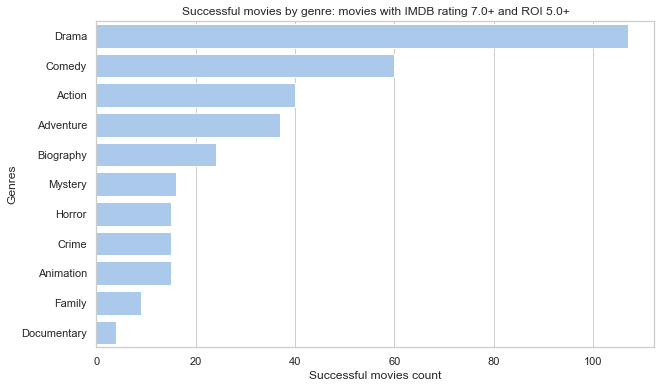

In [187]:
#OPTION 1

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

sns.set_color_codes("pastel")
sns.barplot(x="genres_count", y="genres", data= genres_total,
            label="Successful movies by genres", color="b")
ax.set_xlabel('Successful movies count')
ax.set_ylabel('Genres')
ax.set_title('Successful movies by genre: movies with IMDB rating 7.0+ and ROI 5.0+')



In [188]:
#Grouping by Genres1

genres1 = df_join.groupby('Genres_1').count().sort_values(by = 'tconst', ascending = False)
genres1 = genres1.tconst.reset_index()
genres1 = genres1.rename(columns={"tconst": "genres_count"})
genres1

,Genres_1,genres_count
0,Drama,42
1,Action,40
2,Comedy,36
3,Biography,21
4,Adventure,16
5,Horror,10
6,Crime,5
7,Animation,3
8,Documentary,2
9,Mystery,2


Text(0.5, 1.0, 'Successful movies by genre: movies with IMDB rating 7.0+ and ROI 5.0+')

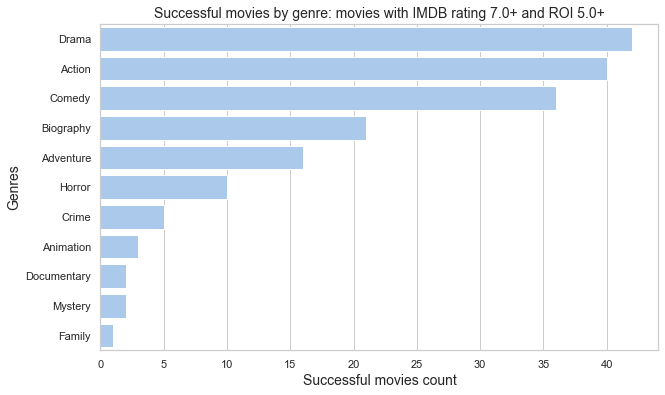

In [321]:
#OPTION 2

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

sns.set_color_codes("pastel")
sns.barplot(x="genres_count", y="Genres_1", data= genres1,
            label="Successful movies by genres", color="b")
ax.set_xlabel('Successful movies count', size=14)
ax.set_ylabel('Genres', size=14)
ax.set_title('Successful movies by genre: movies with IMDB rating 7.0+ and ROI 5.0+', size=14)

In [190]:
#Grouping by Genres2
genres2 = df_join.groupby('Genres_2').count().sort_values(by = 'tconst', ascending = False)
genres2 = genres2.tconst.reset_index()
genres2 = genres2.rename(columns={"tconst": "genres_count"})
genres2

,Genres_2,genres_count
0,Drama,53
1,Adventure,21
2,Romance,13
3,Comedy,12
4,Mystery,12
5,Animation,9
6,Crime,7
7,Sci-Fi,7
8,Fantasy,6
9,Thriller,6


In [253]:
#Grouping top rated movies by directors

top_directors = df_join.groupby('director_name').count().sort_values(by = 'tconst', ascending = False)
top_directors = top_directors.tconst.reset_index()
top_directors = top_directors.rename(columns={"tconst": "movies_count"})
top_directors = top_directors.loc[top_directors['movies_count'] >= 2]
top_directors

,director_name,movies_count
0,James Wan,4
1,Richard Linklater,2
2,John Madden,2
3,David O. Russell,2
4,Paul Feig,2
5,Ryan Coogler,2
6,Damien Chazelle,2
7,Colin Trevorrow,2
8,Michael Showalter,2
9,Francis Lawrence,2


In [192]:
top_directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   director_name  13 non-null     object
 1   movies_count   13 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 312.0+ bytes


In [98]:
directors_roi = round(df_join[['director_name', 'roi']].groupby('director_name').mean(),2)

In [254]:
top_directors_roi = top_directors.join(directors_roi,on = 'director_name',lsuffix= "A", rsuffix= "B").sort_values("roi", ascending=False) 
top_directors_roi


,director_name,movies_count,roi
10,M. Night Shyamalan,2,34.03
12,Jordan Peele,2,31.89
0,James Wan,4,24.41
6,Damien Chazelle,2,16.56
5,Ryan Coogler,2,13.12
8,Michael Showalter,2,12.73
2,John Madden,2,11.25
1,Richard Linklater,2,11.03
3,David O. Russell,2,8.85
4,Paul Feig,2,7.13


In [317]:
# sns.set(style="whitegrid")


# # Initialize the matplotlib figure
# f, ax = plt.subplots(figsize=(6, 6))

# sns.set_color_codes("pastel")
# sns.scatterplot(x="roi", y="movies_count", data= top_directors_roi,
#             label="Top directors", color="b", s = 400)
# ax.set_xlabel('Average ROI on successful movies')
# ax.set_ylabel('Number of successful movies produced')
# ax.set_title('Successful directors: produced 2 or more movies with IMDB rating 7.0+ and ROI 5.0+ ')

# plt.xlim(0, 35)
# plt.ylim(1, 4.5)




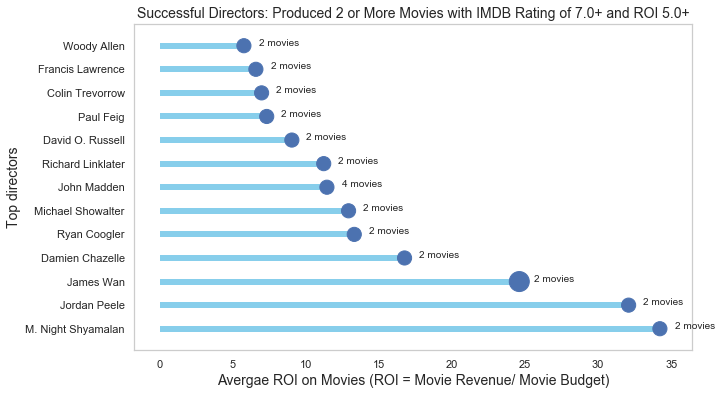

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

sizes = top_directors_roi['movies_count']
sizes1 = top_directors_roi['movies_count']*100


f, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('white')
ax.grid(b=None)
plt.hlines(y="director_name", data= top_directors_roi, xmin=0, xmax=top_directors_roi['roi'], lw=6, color='skyblue', zorder = 1)
plt.scatter(top_directors_roi['roi'] + 0.2, top_directors_roi['director_name'], marker="o", s=sizes1)

plt.title("Successful Directors: Produced 2 or More Movies with IMDB Rating of 7.0+ and ROI 5.0+", size=14, loc='center', zorder = 2)
plt.xlabel('Avergae ROI on Movies (ROI = Movie Revenue/ Movie Budget)', size=14)
plt.ylabel('Top directors', size=14) 

for i, txt in enumerate(sizes):
   plt.annotate(f'{txt:.0f} movies', (top_directors_roi['roi'][i] + 1.2, top_directors_roi['director_name'][i]))
    


In [319]:
df

,group,values
0,A,0.233154
1,B,0.056137
2,C,0.728047
3,D,0.073224
4,E,0.698966
5,F,0.714153
6,G,0.297302
7,H,0.922272
8,I,0.909465
9,J,0.752346


In [342]:
#Creating df_act
cur.execute("""SELECT *
                FROM movies.imdb_title_ratings
                JOIN movies.imdb_title_basics USING(tconst)
                JOIN movies.imdb_title_principals USING (tconst)
                JOIN movies.imdb_name_basics USING (nconst)
                WHERE imdb_title_basics.start_year >= 2010
                AND imdb_title_ratings.averagerating >7.0
                AND imdb_title_ratings.numvotes > 50;""")

df_act = pd.DataFrame(cur.fetchall())
df_act.columns = [x[0] for x in cur.description]
df_act

,nconst,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0365480,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",1,actor,,"[""Joseph Briteman""]",Anthony Harrison,1961.0,NaN,"actor,writer,producer","tt5615700,tt0298814,tt0137204,tt6461824"
1,nm0003210,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",2,actor,,"[""Horst Himmelferger""]",C. Ernst Harth,1970.0,NaN,"actor,producer,soundtrack","tt0379725,tt1319743,tt0245674,tt0137204"
2,nm0367762,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",3,actress,,"[""Eva""]",Ellie Harvie,1965.0,NaN,"actress,writer,director","tt0172031,tt0899106,tt0808510,tt0216216"
3,nm0186322,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",4,actress,,"[""Pauline""]",Chilton Crane,NaN,NaN,actress,"tt0309593,tt1306980,tt0389564,tt0106179"
4,nm0153581,tt0137204,8.10,263,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",5,producer,producer,,Ron Chartier,NaN,NaN,"actor,producer,production_manager","tt0137204,tt0409459,tt0163596,tt0120667"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71996,nm1902682,tt9914286,8.70,136,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",5,writer,,,Kasim Uçkan,NaN,NaN,writer,"tt5373564,tt9914286,tt2865318,tt0456815"
71997,nm10569206,tt9914286,8.70,136,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",6,producer,producer,,Dilek Ölekli,NaN,NaN,,
71998,nm8744743,tt9914286,8.70,136,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",7,composer,,,Onder Samet Kok,NaN,NaN,"composer,sound_department,music_department","tt9174986,tt5084348,tt9139412,tt9668598"
71999,nm6314548,tt9914286,8.70,136,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8,cinematographer,,,Faik Can Akinci,NaN,NaN,"producer,cinematographer","tt4630064,tt3557492"


In [45]:
# Remove special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df_act['primary_title'] = df_act['primary_title'].str.replace(char, ' ')
    
#put Title in low caps
df_act['primary_title'] =  df_act['primary_title'].map(lambda x: x.lower())

df_act.head()

,nconst,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0365480,tt0137204,8.10,263,joe finds grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",1,actor,,"[""Joseph Briteman""]",Anthony Harrison,1961.0,NaN,"actor,writer,producer","tt5615700,tt0298814,tt0137204,tt6461824"
1,nm0003210,tt0137204,8.10,263,joe finds grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",2,actor,,"[""Horst Himmelferger""]",C. Ernst Harth,1970.0,NaN,"actor,producer,soundtrack","tt0379725,tt1319743,tt0245674,tt0137204"
2,nm0367762,tt0137204,8.10,263,joe finds grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",3,actress,,"[""Eva""]",Ellie Harvie,1965.0,NaN,"actress,writer,director","tt0172031,tt0899106,tt0808510,tt0216216"
3,nm0186322,tt0137204,8.10,263,joe finds grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",4,actress,,"[""Pauline""]",Chilton Crane,NaN,NaN,actress,"tt0309593,tt1306980,tt0389564,tt0106179"
4,nm0153581,tt0137204,8.10,263,joe finds grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",5,producer,producer,,Ron Chartier,NaN,NaN,"actor,producer,production_manager","tt0137204,tt0409459,tt0163596,tt0120667"


In [50]:
left_join_df_act = df_join.merge(df_act, on='primary_title', how='left' )
left_join_df_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1340 non-null   int64         
 1   release_date          1340 non-null   datetime64[ns]
 2   primary_title         1340 non-null   object        
 3   production_budget     1340 non-null   int64         
 4   domestic_gross        1340 non-null   int64         
 5   worldwide_gross       1340 non-null   int64         
 6   roi                   1340 non-null   float64       
 7   year                  1340 non-null   int64         
 8   tconst_x              1340 non-null   object        
 9   averagerating_x       1340 non-null   object        
 10  numvotes_x            1340 non-null   float64       
 11  original_title_x      1340 non-null   object        
 12  start_year_x          1340 non-null   float64       
 13  runtime_minutes_x 

In [51]:
df_join_act = left_join_df_act.dropna(subset = ["primary_name"])
df_join_act.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,roi,year,tconst_x,averagerating_x,...,genres_y,ordering,category,job,characters,primary_name,birth_year_y,death_year_y,primary_profession_y,known_for_titles_y
1,50,2017-01-20,split,5000000,138141585,278964806,55.792961,2017,tt4972582,7.30,...,"Horror,Thriller",10.0,editor,,,Luke Ciarrocchi,NaN,NaN,"editorial_department,editor","tt6823368,tt1815862,tt4972582,tt0949731"
2,50,2017-01-20,split,5000000,138141585,278964806,55.792961,2017,tt4972582,7.30,...,"Horror,Thriller",1.0,actor,,"[""Dennis"",""Patricia"",""Hedwig""]",James McAvoy,1979.0,NaN,"actor,soundtrack,producer","tt1450321,tt4972582,tt0783233,tt0455590"
3,50,2017-01-20,split,5000000,138141585,278964806,55.792961,2017,tt4972582,7.30,...,"Horror,Thriller",2.0,actress,,"[""Casey Cooke""]",Anya Taylor-Joy,1996.0,NaN,actress,"tt4520364,tt4972582,tt4263482,tt6823368"
4,50,2017-01-20,split,5000000,138141585,278964806,55.792961,2017,tt4972582,7.30,...,"Horror,Thriller",3.0,actress,,"[""Claire Benoit""]",Haley Lu Richardson,1995.0,NaN,actress,"tt5990474,tt6472976,tt4972582,tt1878870"
5,50,2017-01-20,split,5000000,138141585,278964806,55.792961,2017,tt4972582,7.30,...,"Horror,Thriller",4.0,actress,,"[""Marcia""]",Jessica Sula,1994.0,NaN,actress,"tt2974556,tt0840196,tt4972582,tt5770620"


In [52]:
df_act_count = df_join_act.loc[(df_join_act['category'] == 'actor') |(df_join_act['category'] == 'actress')].groupby('primary_name').count().sort_values(by = 'roi', ascending = False) 
df_act_count = df_act_count.tconst_x.reset_index()
df_act_count = df_act_count.rename(columns={"tconst_x": "how_many_movies"})
df_act_count.how_many_movies.value_counts()

1    306
2     81
3     10
4      3
5      2
Name: how_many_movies, dtype: int64

In [49]:
df_act_count.head(20)

,primary_name,how_many_movies
0,Bradley Cooper,5
1,Octavia Spencer,5
2,John Goodman,4
3,Robert Downey Jr.,4
4,Jennifer Lawrence,4
5,Chris Evans,3
6,Emma Stone,3
7,Judi Dench,3
8,Mark Ruffalo,3
9,Michael B. Jordan,3


In [345]:
act_roi = round(left_join_df_act[['primary_name', 'roi']].groupby('primary_name').mean(),2)

In [357]:
top_actors_roi = df_act_count.join(act_roi,on = 'primary_name',lsuffix= "A", rsuffix= "B").sort_values("how_many_movies", ascending=False) 
top_actors_roi = top_actors_roi.head(15)
top_actors_roi = top_actors_roi.sort_values("roi", ascending=False) 
top_actors_roi

,primary_name,how_many_movies,roi
9,Michael B. Jordan,3,12.18
6,Emma Stone,3,12.04
13,Keira Knightley,3,10.80
1,Octavia Spencer,5,10.52
12,Jason Bateman,3,10.13
2,John Goodman,4,9.99
7,Judi Dench,3,9.09
0,Bradley Cooper,5,8.99
10,Ryan Reynolds,3,8.76
4,Jennifer Lawrence,4,8.21


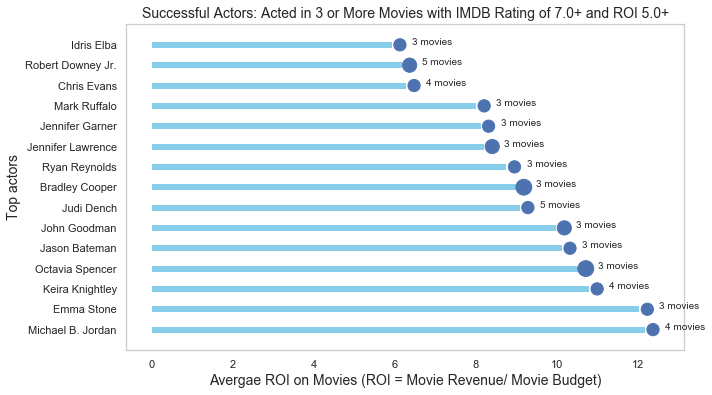

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

sizes2 = top_actors_roi['how_many_movies']
sizes3 = top_actors_roi['how_many_movies']*50


f, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('white')
ax.grid(b=None)
plt.hlines(y="primary_name", data= top_actors_roi, xmin=0, xmax=top_actors_roi['roi'], lw=6, color='skyblue', zorder = 1)
plt.scatter(top_actors_roi['roi'] + 0.2, top_actors_roi['primary_name'], marker="o", s=sizes3)

plt.title("Successful Actors: Acted in 3 or More Movies with IMDB Rating of 7.0+ and ROI 5.0+", size=14, loc='center', zorder = 2)
plt.xlabel('Avergae ROI on Movies (ROI = Movie Revenue/ Movie Budget)', size=14)
plt.ylabel('Top actors', size=14) 

for i, txt in enumerate(sizes2):
   plt.annotate(f'{txt:.0f} movies', (top_actors_roi['roi'][i] +0.5, top_actors_roi['primary_name'][i]))
    
